We have studied and performed calculations for Ordinary Least Squares (OLS) and Principle Component Analysis (PCA).  Here, we will explore some of the similarities and differences of these method.

Much of this comes from the website https://shankarmsy.github.io/posts/pca-vs-lr.html

In [1]:
#Import required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from pprint import pprint 
import seaborn as sns 
from matplotlib import collections as mc 

%matplotlib inline 

In [2]:
np.random.seed(sum(map(ord, "aesthetics"))) 
sns.set_context('notebook') 
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = (15, 5) 

## Ordinary Linear Regression (Univariate)

Let's define an x and y and try to regress y with x, denoted as y~x. That is, 
we are trying to find a model that predictes y from x.

In [3]:
# Data: h = hours studied, m = mark on assessment
h = np.array([[9, 15, 25, 14, 10, 18, 0, 16, 5, 19, 16, 20]]) 
m = np.array([[39, 56, 93, 61, 50, 75, 32, 85, 42, 70, 66, 80]])
h = np.transpose(h)
m = np.transpose(m)
h.shape # check the shape


(12, 1)

In [4]:
# create matrix A to solve find the OLS line m = C+Dh

A = np.column_stack((np.ones(len(h)),h))
A

array([[ 1.,  9.],
       [ 1., 15.],
       [ 1., 25.],
       [ 1., 14.],
       [ 1., 10.],
       [ 1., 18.],
       [ 1.,  0.],
       [ 1., 16.],
       [ 1.,  5.],
       [ 1., 19.],
       [ 1., 16.],
       [ 1., 20.]])

In [5]:
# Create the matrix A+ = (A^T A)^(-1) A^T = V Sigma+U^T, known as a pseudo-inverse matrix
Apinv = np.linalg.pinv(A) # the Numpy command for the pseudo-inverse
print(Apinv.shape) # a check on the shape

# multiply pseudo-inverse by "b", our y data points (here, y = m = marks)
# to get our x-hat, the vector of our coefficients for the regression line
# m = C+Dh
xhat = Apinv@m
m_pred = xhat[0,0]+xhat[1,0]*h # m_pred is what the model predicts for a mark, given the hours studied
C = xhat[0,0] # first entry in x-hat is the y-intercept
D = xhat[1,0] # second entry is the slope
print('The line of regression that predicts a mark given the hours studied is \n m = ',np.round(xhat[0,0],3),'+ ',np.round(xhat[1,0],3),'h')

(2, 12)
The line of regression that predicts a mark given the hours studied is 
 m =  26.561 +  2.576 h


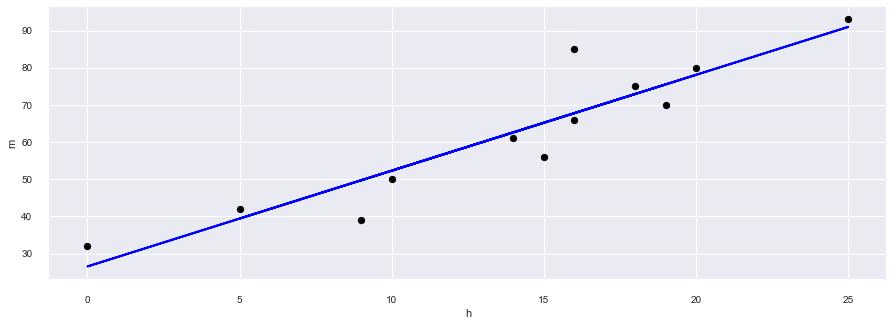

In [31]:
# Define a function to create a scatter plot with the regression line 
def plotline(x1,y1,x2,y2,c,l): 
        plt.scatter(x1, y1, color='black') 
        plt.plot(x2, y2, color=c, linewidth=l) 
        plt.axis('tight') 
        plt.xlabel('h') 
        plt.ylabel('m') 
        sns.despine(offset=10, trim=True) 
        
        
plotline(h,m,h,m_pred,'blue',2)


The above assumed that the data points h were "correct" independent variables and found a least square model for the mark m~h.  

### Is there a difference between m~h and h~m? 

That is, does anything change if we assume the marks are the "correct" independent variables and find a least squares solution for the hours studied h~m.

Let's find out.


In [7]:
# create matrix A to solve find the OLS line h = C+Dm 

A = np.column_stack((np.ones(len(m)),m))
A

array([[ 1., 39.],
       [ 1., 56.],
       [ 1., 93.],
       [ 1., 61.],
       [ 1., 50.],
       [ 1., 75.],
       [ 1., 32.],
       [ 1., 85.],
       [ 1., 42.],
       [ 1., 70.],
       [ 1., 66.],
       [ 1., 80.]])

In [8]:
# Create the matrix A+ = (A^T A)^(-1) A^T = V Sigma+ U^T, known as a pseudo-inverse matrix
Apinv = np.linalg.pinv(A) # the Numpy command for the pseudo-inverse

# multiply pseudo-inverse by "b", our y data points (here, y = h = hours)
# to get our x-hat, the vector of our coefficients for the regression line
# h = C+Dm
xhat = Apinv@h
h_pred = xhat[0,0]+xhat[1,0]*m # the value for h our model predicts based on the mark
C = xhat[0,0] # first entry in x-hat is y-intercept
D = xhat[1,0] # second entry is the slope

print('\n The line of regression that predicts the hours studied given a mark is \n h = ',np.round(xhat[0,0],3),'+ ',np.round(xhat[1,0],3),'m.')

# With this model, we predict a student who scores a 100 on an exam studied for how many hours?
print('\n With this model, we predict a student who scores a 100 on an exam studied for ',np.round(xhat[0,0]+xhat[1,0]*100),' hours.')


 The line of regression that predicts the hours studied given a mark is 
 h =  -6.819 +  0.332 m.

 With this model, we predict a student who scores a 100 on an exam studied for  26.0  hours.


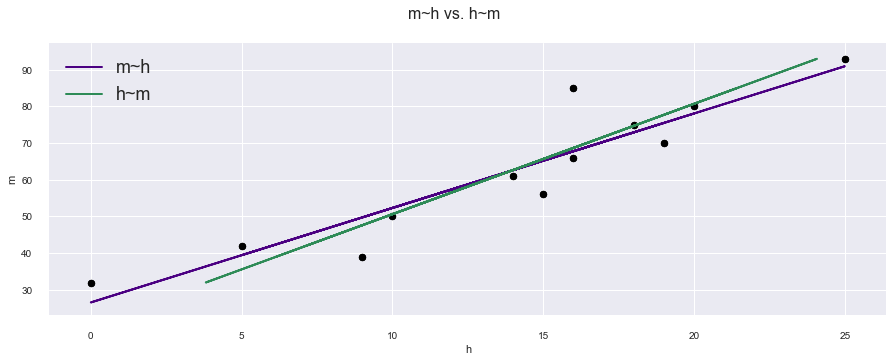

In [9]:
# Define a function that plots the two models together, with the data
def onevstwo(): 
    plotline(h,m,h,m_pred,'indigo',2) 
    plotline(h,m,h_pred,m,'seagreen',2) 
    plt.suptitle('m~h vs. h~m',fontsize=16) 
    plt.legend(['m~h','h~m'], loc='best', fontsize=18) 
    
onevstwo() 
plt.show()


Why do we get two different "best-fit" lines?  

What is the difference between y~x and x~y?  

Let's look at what OLS does when finding a solution to y~x.  That is, let's look at the residual vectors.

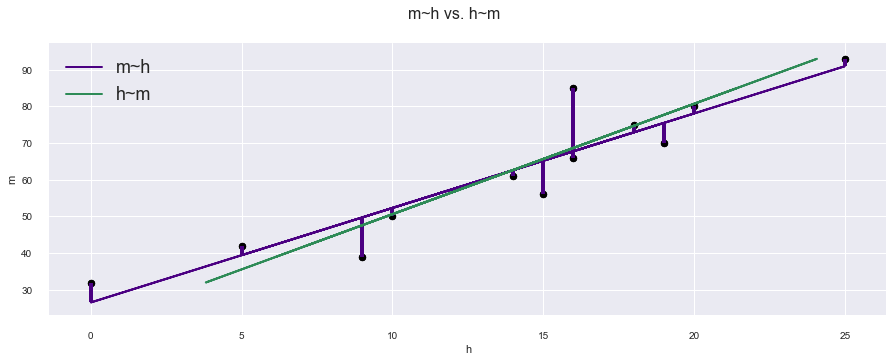

In [10]:
#Flatten our arrays so it's easier to plot 
h,h_pred,m,m_pred=h.ravel(),h_pred.ravel(),m.ravel(),m_pred.ravel() 

#Grab some indices where the difference between m and m_pred is the greatest. 
indices=np.argsort(m-m_pred) 
#Plot some or all sample m-m_pred in the earlier plot 
onevstwo() 
lines=[[(h[i],m[i]), (h[i],m_pred[i])] for i in indices] 
lines=mc.LineCollection(lines, colors='indigo', linewidths=4) 
plt.gca().add_collection(lines) 
plt.show()

Now let's look at what OLS does when finding a solution to x~y.  That is, let's look at the residual vectors, which are now HORIZONTAL.

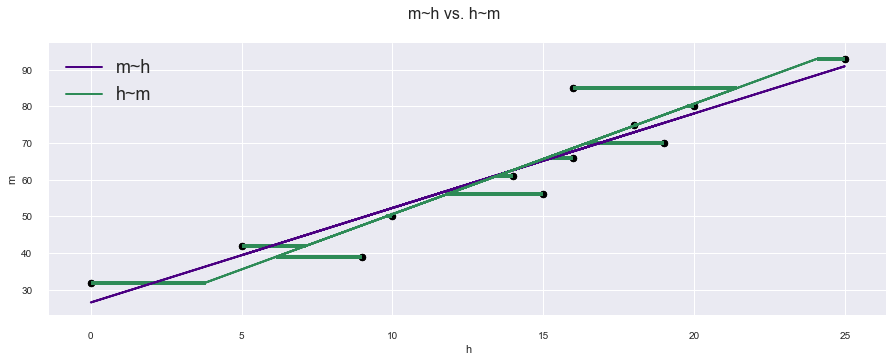

In [11]:
#Create indices if want to select only a few (not done here). 
indices_r=np.argsort(h-h_pred)

onevstwo() 

#Plot the residual vectors (h,m)-(h_pred,m)  
lines=[[(h[i],m[i]), (h_pred[i],m[i])] for i in indices_r] 
lines=mc.LineCollection(lines, colors='seagreen', linewidths=4) 
plt.gca().add_collection(lines) 
plt.show() 

That's the answer:  When we regress x~y instead of y~x, the model tries to minimize the horizontal distances rather than the vertical distances using OLS.


Now we're ready to understand how PCA differs from this.


## PCA vs Linear Regression

We need to combine x and y into the columns of a single matrix so we can perform PCA. 
First, let's then perform PCA using the eigendecomposition of the covariance matrix (rather than SVD).

### Method 1:  Eigendecomposition of the covariance matrix 



In [12]:
# Combine x and y into one matrix X
# here, the variables are given in columns:  column 1 = h, column 2 = m
X=np.column_stack([h,m])
print(X)

[[ 9 39]
 [15 56]
 [25 93]
 [14 61]
 [10 50]
 [18 75]
 [ 0 32]
 [16 85]
 [ 5 42]
 [19 70]
 [16 66]
 [20 80]]


In [13]:
# First, we need to center the data by subracting the mean of the variables

Xc = X-X.mean(axis = 0) # mean(axis = 0) calculates mean down columns, axis = 1 goes across rows
print(Xc)


[[ -4.91666667 -23.41666667]
 [  1.08333333  -6.41666667]
 [ 11.08333333  30.58333333]
 [  0.08333333  -1.41666667]
 [ -3.91666667 -12.41666667]
 [  4.08333333  12.58333333]
 [-13.91666667 -30.41666667]
 [  2.08333333  22.58333333]
 [ -8.91666667 -20.41666667]
 [  5.08333333   7.58333333]
 [  2.08333333   3.58333333]
 [  6.08333333  17.58333333]]


In [14]:
# create the covariance matrix 
# (be careful:  A^TA or AA^T, depending on how the data is arranged)
n_sample = Xc.shape[0] # number of rows in Xc = number of samples in data
C = Xc.T@Xc/(n_sample-1) # create the covariance matrix, in this case X^TX
C.shape

(2, 2)

In [15]:
eig_vals, eig_vecs = np.linalg.eig(C)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print('\lambda = ',i[0],'eigvec v = ',i[1])


Eigenvalues in descending order:
\lambda =  1307.074935844889 eigvec v =  [-0.32008244 -0.94738969]
\lambda =  19.627870230438475 eigvec v =  [-0.94738969  0.32008244]


In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] # calculate percent of variance for each eigenvalue
cum_var_exp = np.cumsum(var_exp) # add up the variance explained

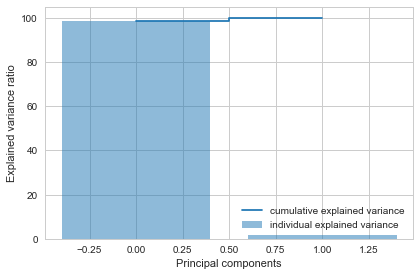

In [17]:
# plot the var_exp using a bar graph
# with the cumulative variance using a line graph
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(2), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(2), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
# look at eigenpairs again
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print('\lambda = ',i[0],'eigvec v = ',i[1])
    
# create matrix V, as in C = V \Lambda V^T
V = np.column_stack((eig_vecs[:,1],eig_vecs[:,0]))
print(V.shape)
print('Matrix V:\n', V)

Eigenvalues in descending order:
\lambda =  1307.074935844889 eigvec v =  [-0.32008244 -0.94738969]
\lambda =  19.627870230438475 eigvec v =  [-0.94738969  0.32008244]
(2, 2)
Matrix V:
 [[-0.32008244 -0.94738969]
 [-0.94738969  0.32008244]]


In [19]:
# Project the data Xc onto the vector V (XV = V\Lambda)
Y = Xc@V
print(Y)

[[ 23.75844731  -2.83726457]
 [  5.73232788  -3.08020118]
 [-32.52191518  -0.71104768]
 [  1.31546186  -0.53239927]
 [ 13.01707825  -0.26374738]
 [-13.22832361   0.15919617]
 [ 33.27091715   3.44866555]
 [-22.06205564   5.2548    ]
 [ 22.19660801   1.91254153]
 [ -8.81145759  -2.38860574]
 [ -4.06165149  -0.82676644]
 [-18.60543696  -0.13517099]]


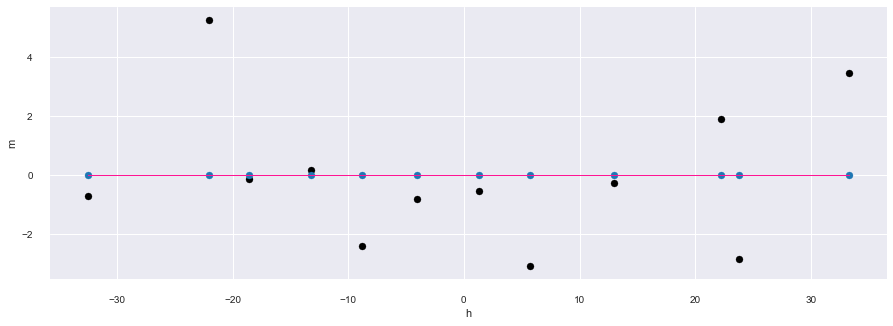

In [20]:
# plot rotated data, best fit line, and projections of data onto the line
plotline(Y[:,0],Y[:,1],Y[:,0],np.zeros((12,1)),'deeppink',1) 
plt.scatter(Y[:,0],np.zeros((12,1)))

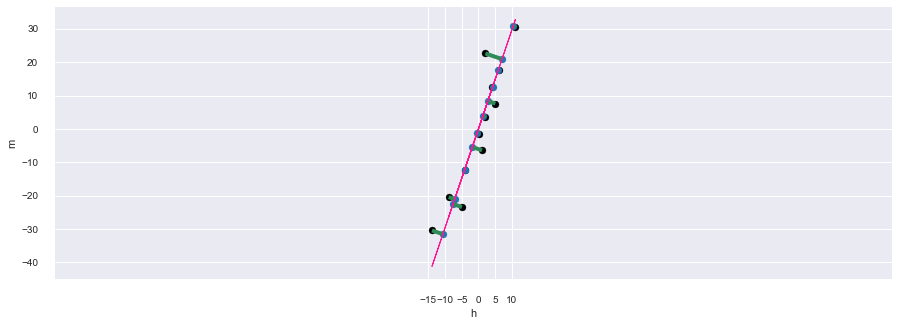

<Figure size 1080x360 with 0 Axes>

In [21]:
m_pca = V[1,0]/V[0,0]*Xc[:,0] # create line along PC 1 = v_1
Z = Y[:,[0]]@V[[0],:]
plotline(Xc[:,0],Xc[:,1],Xc[:,0],m_pca,'deeppink',1) 
plt.scatter(Z[:,0],Z[:,1])

lines=[[(Xc[i,0],Xc[i,1]), (Z[i,0],Z[i,1])] for i in range(0,12)] 
lines=mc.LineCollection(lines, colors='seagreen', linewidths=4) 
plt.gca().add_collection(lines) 
plt.axis('equal')
plt.show() 
plt.tight_layout()

In [22]:

print(X[:,1].mean(0))
adj_m_pca = X[:,1].mean(0)+m_pca # adjust back mean to plot original data 

62.416666666666664


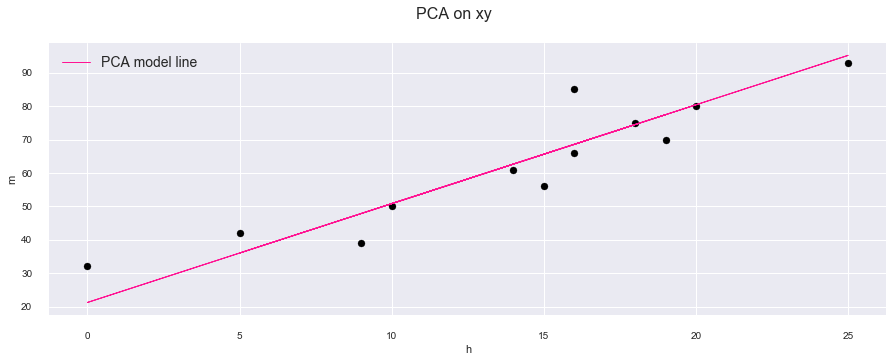

In [23]:
# Plot original data with adjusted PC1 
plotline(h,m,h,adj_m_pca,'deeppink',1) 
plt.suptitle('PCA on xy',fontsize=16) 
plt.legend(['PCA model line'], loc='best', fontsize=14) 
plt.show()

## Using the SVD rather than the covariance matrix spectral decomposition

In [24]:
U,S,VT = np.linalg.svd(Xc,full_matrices = True)
print('\n U.shape = ',U.shape)
print('\n S = ',S)
print('\n S matrix = ',np.diag(S)[0,0])
print('\n VT.shape = ',VT.shape)
print('\n VT = ',VT)



 U.shape =  (12, 12)

 S =  [67.28922942  8.24578298]

 S matrix =  67.28922942318745

 VT.shape =  (2, 2)

 VT =  [[ 0.32008244  0.94738969]
 [-0.94738969  0.32008244]]


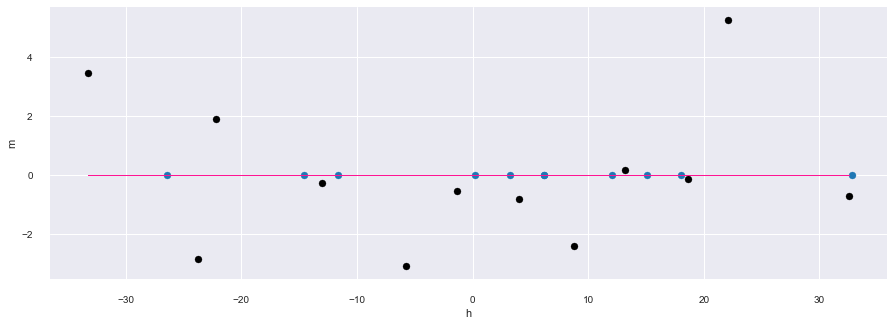

In [25]:
# Project the data Xc onto the vector V (XV = V\Lambda)
# Project the data Xc onto the vector V (XV = V\Lambda)
Y = Xc@np.transpose(VT)

plotline(Y[:,0],Y[:,1],Y[:,0],np.zeros((12,1)),'deeppink',1)
plt.scatter(m_pca,np.zeros((12,1)))


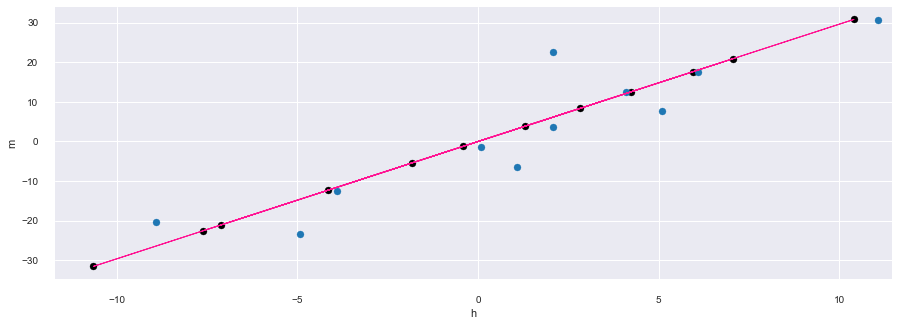

In [26]:
#Plot a few orthogonal values to demonstrate PCA 
Z = Y[:,[0]]@VT[[0],:]
plotline(Z[:,0],Z[:,1],Z[:,0],Z[:,1],'deeppink',1)
plt.scatter(Xc[:,0],Xc[:,1])
#plt.axis('equal')